# Install dan Import Library

In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.8 MB/s eta 0:00:00


In [2]:
!pip install wordCloud

In [3]:
!pip install tensorflow

In [28]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.6 MB/s eta 0:00:00


In [4]:
#impor beberapa library yang di perlukan
import nltk
nltk.download('punkt_tab')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
import nltk
from nltk.tokenize import punkt
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#tampilkan 5 baris teratas dari dataset
df = pd.read_csv('ulasan_aplikasi_whatsapp.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,70392ee0-2287-4f65-bb5c-bffbe1cdff9c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk sampai detik ini wa masih jadi yg paling...,5,660,2.25.13.74,2025-05-01 02:25:28,NaN,NaN,2.25.13.74
1,cb19ce22-44e6-4616-8a43-634e3560284f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya bagus, mudah berkomunikasi dengan...",4,1237,2.25.11.75,2025-04-21 07:25:50,NaN,NaN,2.25.11.75
2,be9766d6-f204-4edd-a174-d0790c6ba222,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sudah bagus apknya tpi kenapa wa saya bug si? ...,5,683,2.25.13.74,2025-05-01 10:47:29,NaN,NaN,2.25.13.74
3,570166de-3a26-4f0d-9874-9057fda88ab7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kontak saya semua hilang tiba tiba,padahal say...",2,39,2.25.13.74,2025-05-01 08:14:56,NaN,NaN,2.25.13.74
4,1068a744-870e-42f0-ac2a-fd6a9f2ecd02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa ya WA sekarang kalau mau update story w...,1,727,2.25.13.74,2025-05-01 08:14:49,NaN,NaN,2.25.13.74


In [6]:
#menampilkan informasi tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              20000 non-null  object 
 1   userName              20000 non-null  object 
 2   userImage             20000 non-null  object 
 3   content               20000 non-null  object 
 4   score                 20000 non-null  int64  
 5   thumbsUpCount         20000 non-null  int64  
 6   reviewCreatedVersion  19964 non-null  object 
 7   at                    20000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            19964 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


In [7]:
# Pilih hanya kolom yang relevan untuk analisis sentimen
# 'content' berisi teks ulasan
# 'score' adalah penilaian dari pengguna yang akan dijadikan label sentimen
df = df[['content', 'score']]
df

,content,score
0,untuk sampai detik ini wa masih jadi yg paling...,5
1,"aplikasi nya bagus, mudah berkomunikasi dengan...",4
2,sudah bagus apknya tpi kenapa wa saya bug si? ...,5
3,"Kontak saya semua hilang tiba tiba,padahal say...",2
4,kenapa ya WA sekarang kalau mau update story w...,1
...,...,...
19995,"Tiba tiba timer pesan default saya berubah, in...",3
19996,"bagus sih, tpi telat terus dapet fitur terbaru...",3
19997,Tolong ini kenapa nomor telp tiba tiba dibilan...,1
19998,Ketika mengirim pesan tidak masuk dan mlhn ada...,1


# Preprocessing Data

In [8]:
def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #hapus mention
  text = re.sub(r'#[A-Za-z0-9]+', '', text) #hapus hashtag
  text = re.sub(r'RT[\s]+', '', text) #hapus RT
  text = re.sub(r'https?:\/\/\S+', '', text) #hapus link
  text = re.sub(r'[0-9]+', '', text) #hapus angka
  text = re.sub(r'[^\w\s]', '', text) #hapus karakter selain huruf dan angka

  text = text.replace('\n', '') #mengganti baris baru dengan spasi
  text = text.translate(str.maketrans('', '', string.punctuation)) #menghapus tanda baca
  text = text.strip('') #menghapus karakter spasi dari kiri dan kanan teks
  return text

def casefoldingText(text): #megubah semua karakter dalam teks menjadi huruf kecil
  text = text.lower()
  return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): #menghapus stopwords dalam text
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['aplikasi', 'chat', 'whatsapp', 'pesan', 'grup', 'telepon', 'video', 'kirim', 'terima', 'notif', 'pesannya',
    'buka', 'masuk', 'user', 'pakai', 'paketan', 'nomor', 'akun', 'fitur', 'ganti', 'tanya', 'kontak', 'message',
    'keluar', 'gagal', 'masalah', 'error', 'login', 'update', 'download', 'instal', 'versi', 'bug', 'customer',
    'service', 'dukungan', 'pengguna', 'rating', 'review', 'notifikasi', 'status', 'foto', 'profile', 'streaming',
    'voice', 'fungsi', 'komunikasi', 'chatting', 'feedback', 'komplain', 'minta', 'bilang', 'whatsappnya', 'komen',
    'panggilan', 'selesai', 'cek', 'pembaharuan', 'instalasi', 'langganan', 'pembaruan', 'gratis', 'sistem',
    'paket', 'isi', 'transfer', 'akses', 'pengaturan', 'call', 'group', 'chatbot', 'verifikasi', 'baterai',
    'koneksi', 'server', 'pemakaian', 'terhubung', 'batal', 'tes', 'teman', 'tunggu', 'ringan', 'tercepat',
    'terbaik', 'nyaman', 'antarmuka', 'sederhana', 'praktis', 'secure', 'privasi', 'confidential', 'rutin',
    'aktifkan', 'diperbaiki', 'riwayat', 'berhenti', 'terganggu', 'lemot', 'sulit', 'hilang', 'pindah',
    'kirim ulang', 'suka', 'rekomendasi', 'solusi', 'cukup', 'sambungan', 'gangguan', 'pembayaran', 'klinik',
    'help', 'kerja', 'perbaiki', 'permintaan', 'kecepatan', 'diperbarui', 'terkunci', 'setuju', 'menunggu',
    'berhasil', 'penggunaan', 'best', 'masalahnya', 'konsultasi', 'panggil', 'testing', 'tambah', 'yg', 'ga',
    'gak', 'nya', 'nggak', 'gk', 'banget', 'nih', 'dah', 'doang', 'sih'
  ])
  filtered = []
  for txt in text:
    if txt not in listStopwords:
      filtered.append(txt)
  text = filtered
  return text

def stemmingText(text): #mengurangi kata ke bentuk yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
  #membuat objek stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  #memecah teks menjadi daftar kata
  words = text.split()

  #menerapkan stemming pada setiap kata dalam daftar
  stemmed_words = [stemmer.stem(word) for word in words]

  #menggabungkan kata-kata yang telah di stemming menjadi teks baru
  stemmed_text = ' '.join(stemmed_words)

  return stemmed_text


def toSentence(list_words): #mengubah daftar kata menjadi kalimat
  sentence = ' '.join(word for word in list_words)
  return sentence

In [9]:
slangwords = {
    'ngeselin': 'menyebalkan', 'ngaco': 'buruk', 'ngadat': 'error',
    'lelet': 'lambat', 'lemot': 'lambat', 'nge-lag': 'lag', 'ngelag': 'lag',
    'ribet': 'rumit', 'susahnya': 'sulitnya', 'payah': 'buruk',
    'gajelas': 'tidak jelas', 'jelak': 'jelek', 'kacau': 'berantakan',
    'ampas': 'buruk', 'sampah': 'buruk', 'parah': 'buruk', 'uda' : 'sudah',
    'bego': 'bodoh', 'kampret': 'kurang ajar', 'sialan': 'kesal',
    'manteplah': 'bagus', 'cepettt': 'cepat', 'sat-set': 'cepat', 'karna' : 'karena',
    'apk': 'aplikasi', 'apknya' : 'aplikasi', 'notif': 'notifikasi', 'dapet': 'dapat',
    'pake': 'pakai', 'kalo': 'kalau', 'kyk': 'seperti', 'gmn': 'bagaimana',
    'ntar': 'nanti', 'trs': 'terus', 'udh': 'sudah', 'blm': 'belum',
    'krn': 'karena', 'tdk': 'tidak', 'jg': 'juga', 'utk': 'untuk', 'ngirim' : 'mengirim',
    'skrng': 'sekarang', 'bnyk': 'banyak', 'dpt': 'dapat', 'lg': 'lagi',
    'wifi': 'wi-fi', 'vidio': 'video', 'voucher': 'kupon', 'gimana' : 'bagaimana',
    'nge-freeze': 'buruk', 'nge-bug': 'buruk', 'stuck': 'buruk', 'sy' : 'saya',
    'render': 'loading', 'crash': 'error', 'uninstal': 'uninstall',
    'storage': 'penyimpanan', 'data': 'kuota', 'knapa' : 'kenapa', 'knp' : 'kenapa',
    'thx': 'terima kasih', 'makasih': 'terima kasih', 'sosmed': 'media sosial',
    'yutub': 'youtube', 'telp': 'telepon', 'sms': 'pesan', 'pov': 'sudut pandang',

    # slang khusus review WhatsApp
    'baper': 'terbawa perasaan', 'gengges': 'mengganggu', 'cemen': 'lemah',
    'ngambek': 'marah', 'lebay': 'berlebihan', 'ngadu domba': 'provokasi',
    'kepo': 'ingin tahu', 'pewe': 'nyaman', 'ngilang': 'pergi',
    'nyepam': 'spam', 'scam': 'penipuan', 'gagal paham': 'salah paham',
    'ngomel': 'menggerutu', 'ngebosenin': 'membosankan', 'takut gagal': 'cemas',
    'capek': 'lelah', 'boring': 'membosankan', 'pusing': 'bingung',
    'wa' : 'whatsapp', 'wae' : 'whatsapp',
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word in slangwords:
            fixed_words.append(slangwords[word])
        else:
            fixed_words.append(word)
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)

# Menguruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

df

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,untuk sampai detik ini wa masih jadi yg paling...,5,untuk sampai detik ini wa masih jadi yg paling...,untuk sampai detik ini wa masih jadi yg paling...,untuk sampai detik ini whatsapp masih jadi yg ...,"[untuk, sampai, detik, ini, whatsapp, masih, j...","[detik, lancar, jaringan, luas, ya, okelah, pu...",detik lancar jaringan luas ya okelah pu instal...
1,"aplikasi nya bagus, mudah berkomunikasi dengan...",4,aplikasi nya bagus mudah berkomunikasi dengan ...,aplikasi nya bagus mudah berkomunikasi dengan ...,aplikasi nya bagus mudah berkomunikasi dengan ...,"[aplikasi, nya, bagus, mudah, berkomunikasi, d...","[bagus, mudah, berkomunikasi, keluarga, dll, s...",bagus mudah berkomunikasi keluarga dll story v...
2,sudah bagus apknya tpi kenapa wa saya bug si? ...,5,sudah bagus apknya tpi kenapa wa saya bug si g...,sudah bagus apknya tpi kenapa wa saya bug si g...,sudah bagus aplikasi tpi kenapa whatsapp saya ...,"[sudah, bagus, aplikasi, tpi, kenapa, whatsapp...","[bagus, tpi, si, gabisa, liat, sw, orang, meng...",bagus tpi si gabisa liat sw orang mengunduh ga...
3,"Kontak saya semua hilang tiba tiba,padahal say...",2,Kontak saya semua hilang tiba tibapadahal saya...,kontak saya semua hilang tiba tibapadahal saya...,kontak saya semua hilang tiba tibapadahal saya...,"[kontak, saya, semua, hilang, tiba, tibapadaha...","[tibapadahal, ngumpulin, bgus, loh, pdhalcuman...",tibapadahal ngumpulin bgus loh pdhalcuman hila...
4,kenapa ya WA sekarang kalau mau update story w...,1,kenapa ya WA sekarang kalau mau update story w...,kenapa ya wa sekarang kalau mau update story w...,kenapa ya whatsapp sekarang kalau mau update s...,"[kenapa, ya, whatsapp, sekarang, kalau, mau, u...","[ya, story, fotonya, lanscape, belakangnya, ba...",ya story fotonya lanscape belakangnya backgrou...
...,...,...,...,...,...,...,...,...
19995,"Tiba tiba timer pesan default saya berubah, in...",3,Tiba tiba timer pesan default saya berubah ini...,tiba tiba timer pesan default saya berubah ini...,tiba tiba timer pesan default saya berubah ini...,"[tiba, tiba, timer, pesan, default, saya, beru...","[timer, default, berubah, apaa, tolong, beneri...",timer default berubah apaa tolong benerin apli...
19996,"bagus sih, tpi telat terus dapet fitur terbaru...",3,bagus sih tpi telat terus dapet fitur terbarun...,bagus sih tpi telat terus dapet fitur terbarun...,bagus sih tpi telat terus dapat fitur terbarun...,"[bagus, sih, tpi, telat, terus, dapat, fitur, ...","[bagus, tpi, telat, terbarunya, kesel, udah, h...",bagus tpi telat terbarunya kesel udah hapus ng...
19997,Tolong ini kenapa nomor telp tiba tiba dibilan...,1,Tolong ini kenapa nomor telp tiba tiba dibilan...,tolong ini kenapa nomor telp tiba tiba dibilan...,tolong ini kenapa nomor telepon tiba tiba dibi...,"[tolong, ini, kenapa, nomor, telepon, tiba, ti...","[tolong, dibilang, spam, ya, terblokir, gabisa...",tolong dibilang spam ya terblokir gabisa diaks...
19998,Ketika mengirim pesan tidak masuk dan mlhn ada...,1,Ketika mengirim pesan tidak masuk dan mlhn ada...,ketika mengirim pesan tidak masuk dan mlhn ada...,ketika mengirim pesan tidak masuk dan mlhn ada...,"[ketika, mengirim, pesan, tidak, masuk, dan, m...","[mengirim, mlhn, tanda, seru, kuota, tpi, terk...",mengirim mlhn tanda seru kuota tpi terkirim tb...


In [11]:
import csv
import requests
from io import StringIO

#membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
#mengirim permintaan HTTP untuk mendapatkan di csv dari github

if response.status_code == 200: #jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',') #membaca teks respons sebagai file csv menggunakan pembaca scv dengam peisah koma


    for row in reader: # Mengulangi setiap baris dalam file CSV
      lexicon_positive[row[0]] = int(row[1]) #Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")


# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [12]:
# Fungsi untuk menentukan polaritas sentimen dari ulasan di play store

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    return score, polarity

In [13]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    11765
negative     8235
Name: count, dtype: int64


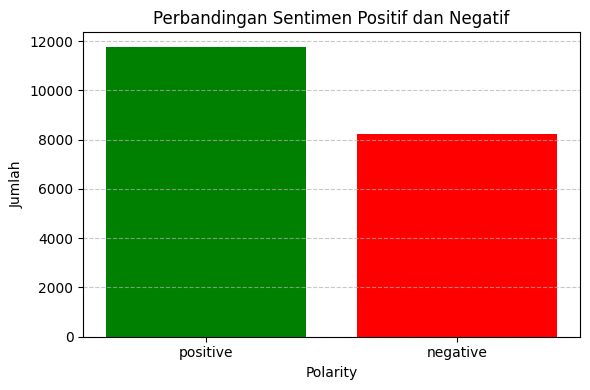

In [14]:
# Hitung jumlah tiap polaritas
polarity_counts = df['polarity'].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(polarity_counts.index, polarity_counts.values, color=['green', 'red'])
plt.title('Perbandingan Sentimen Positif dan Negatif')
plt.xlabel('Polarity')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

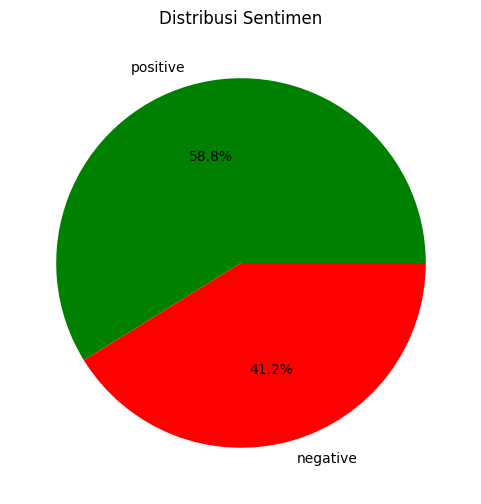

In [15]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(polarity_counts.values, labels=polarity_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribusi Sentimen')
plt.show()

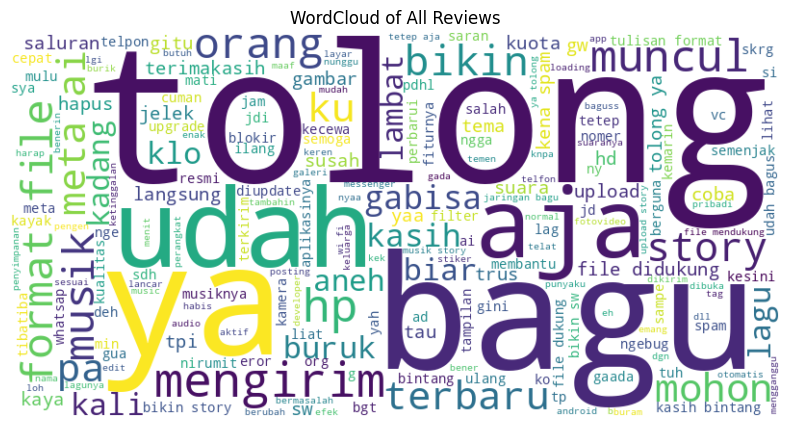

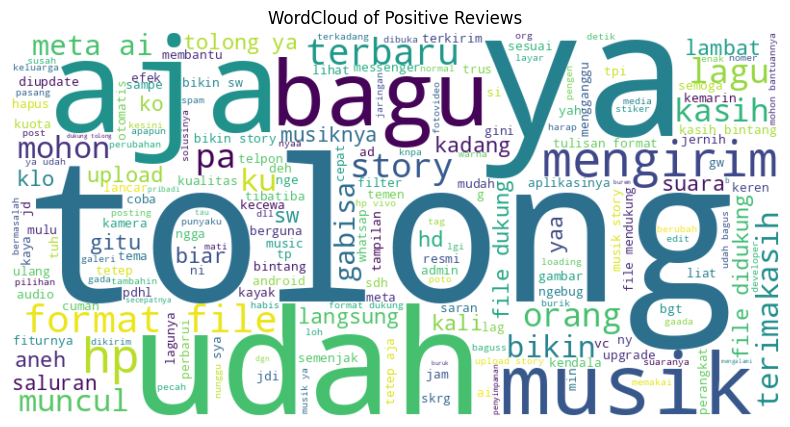

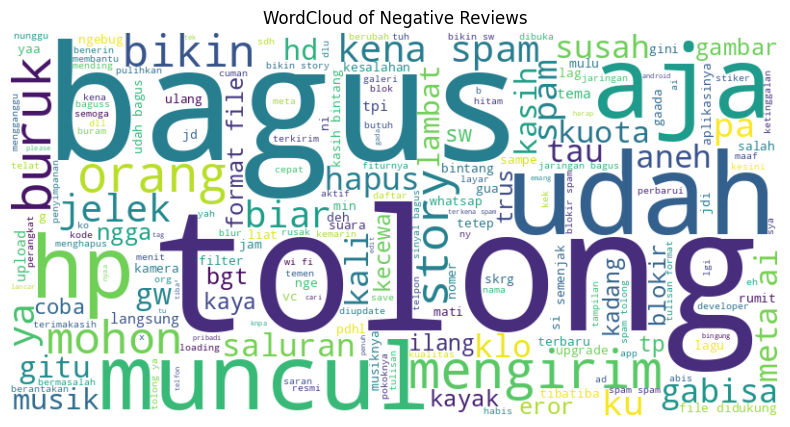

In [16]:
# Membuat wordCloud general, wordcloud positif, wordcloud negatif dari polarity
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

#Menggabungkan semua teks menjadi satu string
all_text = ' '.join(df['text_akhir'])
mid_point = len(all_text) // 2
half_text_from_back = all_text[mid_point:]

#Membuat wordcloud untuk semua teks
create_wordcloud(all_text, 'WordCloud of All Reviews')
print('\n')

#Membuat wordcloud untuk teks positif
positive_text = ' '.join(df[df['polarity'] == 'positive']['text_akhir'])
create_wordcloud(positive_text, 'WordCloud of Positive Reviews')
print('\n')

#Membuat wordcloud untuk teks negatif
negative_text = ' '.join(df[df['polarity'] == 'negative']['text_akhir'])
create_wordcloud(negative_text, 'WordCloud of Negative Reviews')
print('\n')

# Data Splitting dan Extrasi Fitur dengan TF-IDF

In [17]:
import joblib

# Melakukan Data Splitting dan Ekstrasi Fitur Tf-IDF
X = df['text_akhir']
y = df['polarity']

# Ekstraksi Fitur dengan Tf-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.6, stop_words='english', ngram_range=(1,1))
X_tfidf = tfidf.fit_transform(X)

# Simpan vectorizer setelah fitting
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Konversi hasil ekstraksi fitur menjadi DataFrame
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Modelling

## Machine Learning

### SVM

In [18]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Membuat objek model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM pada data pelatihan
svm_model.fit(X_train, y_train)

# ✅ Simpan model SVM setelah training
joblib.dump(svm_model, 'svm_sentiment_model.pkl')

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Prediksi semua data (opsional)
predictions = svm_model.predict(X_tfidf)

# Evaluasi akurasi model SVM
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.9218125
SVM - accuracy_test: 0.9


### Naive Bayes

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)

# ✅ Simpan model Naive Bayes
joblib.dump(naive_bayes, 'naive_bayes_sentiment_model.pkl')

# Prediksi
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Tampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8056875
Naive Bayes - accuracy_test: 0.80375


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Buat model Random Forest dengan parameter yang lebih seimbang
random_forest = RandomForestClassifier(
    n_estimators=100,       # jumlah pohon
    max_depth=10,           # batasi kedalaman pohon
    min_samples_split=5,    # minimum sampel untuk split
    min_samples_leaf=2,     # minimum sampel di daun
    random_state=42,
    n_jobs=-1               # untuk paralel komputasi
)

# Latih model
random_forest.fit(X_train.toarray(), y_train)

# ✅ Simpan model
joblib.dump(random_forest, 'random_forest_sentiment_model.pkl')

# Prediksi
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Tampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.7125714285714285
Random Forest - accuracy_test: 0.7065


### Logistic Regression

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Buat dan latih model Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.toarray(), y_train)

# ✅ Simpan model Logistic Regression
joblib.dump(logistic_regression, 'logistic_regression_sentiment_model.pkl')

# Prediksi
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Tampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.91
Logistic Regression - accuracy_test: 0.8873333333333333


### Decision Tree

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train.toarray(), y_train)

# ✅ Simpan model Decision Tree
joblib.dump(decision_tree, 'decision_tree_sentiment_model.pkl')

# Prediksi
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Tampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9989375
Decision Tree - accuracy_test: 0.7875


## Deep Learning

### ANN

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Mengonversi label 'positive' dan 'negative' menjadi angka 1 dan 0
y = y.map({'positive': 1, 'negative': 0})

# Pastikan tipe data y sudah menjadi integer
y = y.astype('int')

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

# Inisialisasi model Sequential
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer (untuk klasifikasi biner)
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test, y_test)
print('Deep Learning - accuracy_test:', accuracy)

# Simpan model ke file
model.save('ann_sentiment_model.h5')

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7078 - loss: 0.5373 - val_accuracy: 0.8857 - val_loss: 0.2736
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8990 - loss: 0.2499 - val_accuracy: 0.8970 - val_loss: 0.2533
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9239 - loss: 0.2005 - val_accuracy: 0.9055 - val_loss: 0.2443
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9419 - loss: 0.1656 - val_accuracy: 0.9055 - val_loss: 0.2511
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9582 - loss: 0.1319 - val_accuracy: 0.9030 - val_loss: 0.2657
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9652 - loss: 0.1110 - val_accuracy: 0.9018 - val_loss: 0.2924
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9762 - loss: 0.0811 - val_accuracy: 0.8988 - val_loss: 0.3216
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9820 - loss: 0.0633 - val_accuracy: 0.

Deep Learning - accuracy_test: 0.8982499837875366


### CNN

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X = X_tfidf (sudah berbentuk matriks fitur)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

# Inisialisasi model Sequential
model = Sequential()

# Tambahkan layer embedding untuk representasi kata (di sini kita bisa langsung skip karena menggunakan TF-IDF)
# Jika ingin menggunakan word embeddings, tambahkan layer embedding.
# model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))

# Convolutional Layer (CNN)
model.add(Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Global Max Pooling
model.add(GlobalMaxPooling1D())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Untuk klasifikasi biner

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input agar sesuai dengan input yang diinginkan oleh Conv1D (input_shape=(samples, timesteps, features))
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Latih model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print('Deep Learning CNN - accuracy_test:', accuracy)

# Simpan model ke file
model.save('cnn_sentiment_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5838 - loss: 0.6786 - val_accuracy: 0.5965 - val_loss: 0.6718
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5947 - loss: 0.6731 - val_accuracy: 0.5965 - val_loss: 0.6705
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5917 - loss: 0.6736 - val_accuracy: 0.5965 - val_loss: 0.6705
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5927 - loss: 0.6730 - val_accuracy: 0.5965 - val_loss: 0.6708
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5849 - loss: 0.6738 - val_accuracy: 0.5965 - val_loss: 0.6695
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5875 - loss: 0.6730 - val_accuracy: 0.5965 - val_loss: 0.6683
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5867 - loss: 0.6729 - val_accuracy: 0.5965 - val_loss: 0.6691
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5862 - loss: 0.6723 - val_accuracy: 0.

Deep Learning CNN - accuracy_test: 0.5964999794960022


### LSTM

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X = X_tfidf (sudah berbentuk matriks fitur)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

# Inisialisasi model Sequential
model = Sequential()

# Reshape input agar sesuai dengan input yang diinginkan oleh LSTM (input_shape=(samples, timesteps, features))
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Tambahkan layer LSTM
model.add(LSTM(128, activation='tanh', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.3))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Untuk klasifikasi biner

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print('Deep Learning LSTM - accuracy_test:', accuracy)

# Simpan model ke file
model.save('lstm_sentiment_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.5804 - loss: 0.6810 - val_accuracy: 0.5965 - val_loss: 0.6745
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.5854 - loss: 0.6773 - val_accuracy: 0.5965 - val_loss: 0.6711
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.5914 - loss: 0.6671 - val_accuracy: 0.5935 - val_loss: 0.6631
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.5846 - loss: 0.6588 - val_accuracy: 0.5943 - val_loss: 0.6606
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.5817 - loss: 0.6601 - val_accuracy: 0.5970 - val_loss: 0.6622
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.5902 - loss: 0.6539 - val_accuracy: 0.5968 - val_loss: 0.6591
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.5883 - loss: 0.6555 - val_accuracy: 0.5982 - val_loss: 0.6582
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.5924 - loss: 0.6524 - 

Deep Learning LSTM - accuracy_test: 0.5962499976158142


### BiLSTM

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

# X = X_tfidf (sudah berbentuk matriks fitur)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

# Inisialisasi model Sequential
model = Sequential()

# Reshape input agar sesuai dengan input yang diinginkan oleh BiLSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Menambahkan BiLSTM (Bidirectional LSTM)
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=False), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.3))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Untuk klasifikasi biner

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print('BiLSTM - accuracy_test:', accuracy)

# Simpan model ke file
model.save('bilstm_sentiment_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.5819 - loss: 0.6829 - val_accuracy: 0.5838 - val_loss: 0.6730
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.5766 - loss: 0.6825 - val_accuracy: 0.5965 - val_loss: 0.6743
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.5837 - loss: 0.6794 - val_accuracy: 0.5965 - val_loss: 0.6750
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.5895 - loss: 0.6733 - val_accuracy: 0.5955 - val_loss: 0.6650
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.5894 - loss: 0.6570 - val_accuracy: 0.5882 - val_loss: 0.6630
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.5830 - loss: 0.6529 - val_accuracy: 0.5975 - val_loss: 0.6592
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.5844 - loss: 0.6542 - val_accuracy: 0.5985 - val_loss: 0.6555
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.5904 - loss: 0.6549 - 

### GRU

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# X = X_tfidf (sudah berbentuk matriks fitur)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

# Inisialisasi model Sequential
model = Sequential()

# Reshape input agar sesuai dengan input yang diinginkan oleh GRU
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Menambahkan GRU layer
model.add(GRU(128, activation='tanh', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.3))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Untuk klasifikasi biner

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print('GRU - accuracy_test:', accuracy)

# Simpan model ke file
model.save('gru_sentiment_model.h5')

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.5856 - loss: 0.6805 - val_accuracy: 0.5968 - val_loss: 0.6741
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.5901 - loss: 0.6710 - val_accuracy: 0.5957 - val_loss: 0.6601
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.5905 - loss: 0.6576 - val_accuracy: 0.5972 - val_loss: 0.6597
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.5902 - loss: 0.6557 - val_accuracy: 0.5985 - val_loss: 0.6585
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.5888 - loss: 0.6542 - val_accuracy: 0.5980 - val_loss: 0.6576
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.5871 - loss: 0.6572 - val_accuracy: 0.5903 - val_loss: 0.6613
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.5752 - loss: 0.6586 - val_accuracy: 0.5990 - val_loss: 0.6563
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5921 - loss: 0.6505 - 

GRU - accuracy_test: 0.5972499847412109


## Inference

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load TF-IDF dan model SVM yang sudah disimpan
vectorizer = joblib.load('tfidf_vectorizer.pkl')
svm_model = joblib.load('Model/svm_sentiment_model.pkl')

# Teks input untuk prediksi
text_input = ["Aplikasi ini sangat berguna dan memiliki fungsi yang baik"]

# Preprocessing + TF-IDF transform
X_input = vectorizer.transform(text_input)

# Prediksi
predicted_label = svm_model.predict(X_input)
print("Prediksi (SVM):", predicted_label[0])


Prediksi (SVM): positive


In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

# Load model dan vectorizer
model = load_model('Model/DeepLearning/ann_sentiment_model.h5')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Teks yang ingin diprediksi
text_input = ["Layanan pelanggan sangat buruk dan mengecewakan"]

# Transform jadi TF-IDF
X_input_tfidf = vectorizer.transform(text_input).toarray()

# Reshape
X_input_reshaped = X_input_tfidf.reshape(X_input_tfidf.shape[0], X_input_tfidf.shape[1], 1)

# Prediksi
prob = model.predict(X_input_reshaped)
predicted_class = (prob > 0.5).astype("int32")

# Tampilkan hasil
label = "Positif" if predicted_class[0][0] == 1 else "Negatif"
print("Prediksi Sentimen (Deep Learning):", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Prediksi Sentimen (Deep Learning): Negatif
